# Exp6
we want to convert all string to numeric unique ID (lookup table) and see what happens to rankings and nearest neighbours

In [36]:
!mkdir temp/exp6

In [45]:
import sys
sys.path.append("../..")

In [52]:
import deepmatcher as dm
import pandas as pd
import torch

In [5]:
train_df = pd.read_csv('../../Structured/itunes-amazon/merged_train.csv')
validation_df = pd.read_csv('../../Structured/itunes-amazon/merged_valid.csv')
test_df = pd.read_csv('../../Structured/itunes-amazon/merged_test.csv')

In [27]:
columns = list(train_df)
selected_columns = [col for col in columns if col not in ['id','label']]
selected_columns

['ltable_Song_Name',
 'ltable_Artist_Name',
 'ltable_Album_Name',
 'ltable_Genre',
 'ltable_Price',
 'ltable_CopyRight',
 'ltable_Time',
 'ltable_Released',
 'rtable_Song_Name',
 'rtable_Artist_Name',
 'rtable_Album_Name',
 'rtable_Genre',
 'rtable_Price',
 'rtable_CopyRight',
 'rtable_Time',
 'rtable_Released']

In [9]:
import random as rd
def update_dictionary (dictionary,start_id,end_id,df,columns):
    for idx,row in df.iterrows():
        for col in columns:
            current_word = row[col]
            if not(isinstance(current_word,str)):
                current_word = str(current_word)
            for word in current_word.split(" "):
                if word not in dictionary.keys():
                    dictionary[word] = rd.randint(start_id,end_id)

In [10]:
import random as rd
def update_dictionary2 (dictionary,start_id,df,columns):
    curr_id = start_id
    for idx,row in df.iterrows():
        for col in columns:
            current_word = row[col]
            if not(isinstance(current_word,str)):
                current_word = str(current_word)
            for word in current_word.split(" "):
                if word not in dictionary.keys():
                    dictionary[word] = curr_id
                    curr_id += 1

In [11]:
dataset_df = pd.concat([train_df,validation_df,test_df])
dataset_df.shape

(539, 18)

In [14]:
wordDictionary = {}

In [14]:
## run this cell if you prefer random encoding
update_dictionary(wordDictionary,0,2200,dataset_df,selected_columns)                

In [15]:
update_dictionary2(wordDictionary,0,dataset_df,selected_columns)

In [22]:
def convert_attribute_to_idlist(attr,dictionary=wordDictionary):
    if not(isinstance(attr,str)):
        return attr
    new_attr = list(map(lambda token: str(dictionary[token]),attr.split()))
    return (" ".join(new_attr))

In [29]:
train_df_numericencoding = train_df.applymap(lambda c: convert_attribute_to_idlist(c))
validation_df_numericencoding = validation_df.applymap(lambda c: convert_attribute_to_idlist(c))
test_df_numericencoding = test_df.applymap(lambda c:convert_attribute_to_idlist(c))

In [37]:
train_df_numericencoding.to_csv('temp/exp6/train_numericencoding.csv',index=False)
validation_df_numericencoding.to_csv('temp/exp6/validation_numericencoding.csv',index=False)
test_df_numericencoding.to_csv('temp/exp6/test_numericencoding.csv',index=False)

In [38]:
all_numericencoding = pd.concat([train_df_numericencoding,validation_df_numericencoding,test_df_numericencoding])
all_numericencoding.shape

(539, 18)

In [39]:
all_pos = all_numericencoding[all_numericencoding['label']==1]
all_neg = all_numericencoding[all_numericencoding['label']==0]

In [40]:
all_pos.head()

,label,ltable_Song_Name,ltable_Artist_Name,ltable_Album_Name,ltable_Genre,ltable_Price,ltable_CopyRight,ltable_Time,ltable_Released,rtable_Song_Name,rtable_Artist_Name,rtable_Album_Name,rtable_Genre,rtable_Price,rtable_CopyRight,rtable_Time,rtable_Released,id
3,1,72 36 73,74 75 76,77 78,79 10 11 10 80 81 10 82 79,13 14,83 74 75 76 10 84 85 52 86 87 88 17 89,90,91,72 92 73,74 75 76,77 78,79,13 14,1 26 5 83 74 75 76 84 85 52 86 87 88 17 89,93,94 95 10 83,102
25,1,415,391 392,415 350 1 105 416 5,108 10 11 10 9 10 45,13 14,417 418 297 393 109 1 394 5,419,420,415,391 392,415,108,13 14,1 26 5 297 393 109 1 394 5,419,70 421 10 297,308
31,1,7 8 1 2 3 137 138 5,139 140,141 142,143 10 11 10 144 10 145 146 144 10 147 144 10 45,13 14,83 112 113 114 115 43 116 117 36 148 149 150 1...,157,158,7 8 1 2 3 137 138 5 21 65 24,139 140,141 142 21 65 24,144 25 166,13 14,83 112 113 114 115 43 116 117 36 148 149 150 1...,157,70 168 10 83,35
32,1,466 467 1 468 5 21 469 470 470 102 101 24,471 472,466 467 1 468 5 205 105 403,143 10 11 10 12 10 144 10 473 474 10 9,13 14,417 418 217 112 113 114 115 43 116 117 36 148 ...,475,476,466 467 1 468 5,471 472,58 426 471 1 399 282 5 21 105 24 21 477 478 24...,144 25 166,13 14,217 112 113 114 115 43 116 117 36 148 149 150 ...,121,135 71 10 217,9
35,1,529,250 530,531,242 243 244 10 11 10 45 10 82 242,13 14,417 418 207 532 25 533 10 150,534,535,529 1 176 106 1 177 5 5 21 179 24,250 530,531 1 177 106 5 21 179 24,242,13 14,1 26 5 297 532 25 533 10 150,534,187 29 10 15,169


In [41]:
all_pos.to_csv('temp/exp6/positives_numericencoding.csv',index=False)
all_neg.to_csv('temp/exp6/negatives_numericencoding.csv',index=False)

## Train model with numeric data

In [42]:
train,validation,test = dm.data.process('temp/exp6',train='train_numericencoding.csv',validation=
                                       'validation_numericencoding.csv',test='test_numericencoding.csv',
                                       left_prefix='ltable_',right_prefix='rtable_')

In [43]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
hybrid_model.run_train(train,validation,best_save_path='temp/exp6/hybrid_numeric.pth',batch_size=16,
                      pos_neg_ratio=4)

* Number of trainable parameters: 17757810
===>  TRAIN Epoch 1
Finished Epoch 1 || Run Time:    9.1 | Load Time:    1.4 || F1:  53.99 | Prec:  38.38 | Rec:  91.03 || Ex/s:  30.57

===>  EVAL Epoch 1
Finished Epoch 1 || Run Time:    1.1 | Load Time:    0.4 || F1:  61.82 | Prec:  60.71 | Rec:  62.96 || Ex/s:  69.28

* Best F1: 61.81818181818181
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 2
Finished Epoch 2 || Run Time:    8.6 | Load Time:    1.4 || F1:  66.04 | Prec:  52.24 | Rec:  89.74 || Ex/s:  32.16

===>  EVAL Epoch 2
Finished Epoch 2 || Run Time:    1.2 | Load Time:    0.4 || F1:  70.59 | Prec:  75.00 | Rec:  66.67 || Ex/s:  66.73

* Best F1: 70.58823529411764
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 3
Finished Epoch 3 || Run Time:    8.3 | Load Time:    1.4 || F1:  76.29 | Prec:  63.79 | Rec:  94.87 || Ex/s:  33.37

===>  EVAL Epoch 3
Finished Epoch 3 || Run Time:    1.0 | Load Time:    0.4 || F1:  82.76 | Prec:  77.42 | Rec:  88.

Finished Epoch 27 || Run Time:    1.1 | Load Time:    0.4 || F1:  88.14 | Prec:  81.25 | Rec:  96.30 || Ex/s:  72.74

---------------------

===>  TRAIN Epoch 28
Finished Epoch 28 || Run Time:    8.4 | Load Time:    1.3 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s:  32.87

===>  EVAL Epoch 28
Finished Epoch 28 || Run Time:    1.0 | Load Time:    0.4 || F1:  88.14 | Prec:  81.25 | Rec:  96.30 || Ex/s:  80.05

---------------------

===>  TRAIN Epoch 29
Finished Epoch 29 || Run Time:    8.3 | Load Time:    1.4 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s:  33.26

===>  EVAL Epoch 29
Finished Epoch 29 || Run Time:    1.2 | Load Time:    0.5 || F1:  88.14 | Prec:  81.25 | Rec:  96.30 || Ex/s:  63.52

---------------------

===>  TRAIN Epoch 30
Finished Epoch 30 || Run Time:    7.8 | Load Time:    1.3 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s:  34.97

===>  EVAL Epoch 30
Finished Epoch 30 || Run Time:    0.9 | Load Time:    0.4 || F1:  88.14 | Prec:  81.25 | Rec:  96.30

89.6551724137931

In [44]:
hybrid_model.run_eval(test)

===>  EVAL Epoch 6
Finished Epoch 6 || Run Time:    0.7 | Load Time:    0.5 || F1:  88.14 | Prec:  81.25 | Rec:  96.30 || Ex/s:  88.67



88.13559322033898

## Compute rankings

In [46]:
from utilities_functions.intermediate_layer_extraction import return_layer_input
from utilities_functions.ri_calculator import find_smallest_variation_to_change

In [49]:
attributes = ['Song_Name','Artist_Name','Album_Name','Genre','Price','CopyRight','Time','Released']

neg_classifier_inputs,neg_ids = return_layer_input('temp/exp6','negatives_numericencoding',32,hybrid_model,
                                                                        hybrid_model.classifier)
pos_classifier_inputs,pos_ids = return_layer_input('temp/exp6','positives_numericencoding',32,hybrid_model,
                                                                       hybrid_model.classifier)

In [50]:
current_sample = 0
#each column of this matrix is related to a specific attribute
negatives_ri_matrix = []
for batch in neg_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=1200,
                                                                                    attribute_length=150,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)]
                                                                                    ,class_to_reach=1),attributes))
        negatives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34
Processing sample number 35
Pr

Processing sample number 287
Processing sample number 288
Processing sample number 289
Processing sample number 290
Processing sample number 291
Processing sample number 292
Processing sample number 293
Processing sample number 294
Processing sample number 295
Processing sample number 296
Processing sample number 297
Processing sample number 298
Processing sample number 299
Processing sample number 300
Processing sample number 301
Processing sample number 302
Processing sample number 303
Processing sample number 304
Processing sample number 305
Processing sample number 306
Processing sample number 307
Processing sample number 308
Processing sample number 309
Processing sample number 310
Processing sample number 311
Processing sample number 312
Processing sample number 313
Processing sample number 314
Processing sample number 315
Processing sample number 316
Processing sample number 317
Processing sample number 318
Processing sample number 319
Processing sample number 320
Processing sam

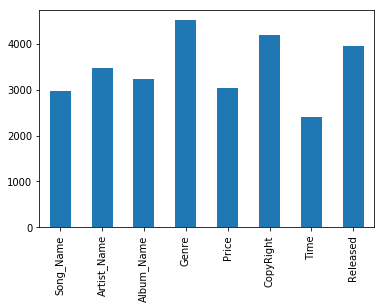

In [54]:
ri_norms_negative_samples = []
for ri_list in negatives_ri_matrix:
    ri_norms_negative_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
neg_variation_df = pd.DataFrame(data= ri_norms_negative_samples,columns=attributes)
neg_variation_df.sum().plot.bar()

In [58]:
neg_variation_df.to_csv('experiments-results/exp6/negatives_numeric_ri.csv',index=False)

In [56]:
current_sample = 0
#each column of this matrix is related to a specific attribute
positives_ri_matrix = []
for batch in pos_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=1200,
                                                                                    attribute_length=150,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)]
                                                                                    ,class_to_reach=0),attributes))
        positives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34
Processing sample number 35
Pr

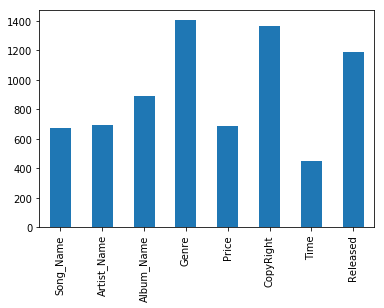

In [57]:
ri_norms_pos = []
for ri_list in positives_ri_matrix:
    ri_norms_pos.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
pos_variation_df = pd.DataFrame(data= ri_norms_pos,columns=attributes)
pos_variation_df.sum().plot.bar()

In [59]:
pos_variation_df.to_csv('experiments-results/exp6/positives_numeric_ri.csv',index=False)

## Nearest neighbours computation

In [60]:
from utilities_functions.distance_measures import nearest_neighbour,nearest_neighbour_onAttribute

In [61]:
#lista di tuple: vettore più vicino considerando tutti gli elementi e closer solo secondo un attributo
negatives_closer_vectors = []
i = 0
for batch in neg_classifier_inputs:
    for sample in batch:
        current_sample_closer_vectors = list(map(lambda att: nearest_neighbour_onAttribute
                                                 (sample+negatives_ri_matrix[i][attributes.index(att)]
                                                                ,pos_classifier_inputs,attributes.index(att),
                                                                150,'cosine'),attributes))
        negatives_closer_vectors.append(current_sample_closer_vectors)
        i += 1 

In [62]:
# per ogni attributo trovo il più vicino
positives_closer_vectors = []
i = 0
for batch in pos_classifier_inputs:
    for sample in batch:
        current_sample_closer_vectors = list(map(lambda att: nearest_neighbour_onAttribute
                                                 (sample+positives_ri_matrix[i][attributes.index(att)]
                                                                ,neg_classifier_inputs,attributes.index(att),
                                                                150,'cosine'),attributes))
        positives_closer_vectors.append(current_sample_closer_vectors)
        i += 1 

In [63]:
positives_closer_vectors_df = pd.DataFrame(data= positives_closer_vectors,columns =attributes)
positives_closer_vectors_df = positives_closer_vectors_df.applymap(lambda c:neg_ids[c])
negatives_closer_vectors_df = pd.DataFrame(data = negatives_closer_vectors, columns = attributes)
negatives_closer_vectors_df = negatives_closer_vectors_df.applymap(lambda c: pos_ids[c])

In [65]:
positives_closer_vectors_df['SampleID'] = pos_ids
negatives_closer_vectors_df['SampleID'] = neg_ids

In [66]:
positives_closer_vectors_df.to_csv('experiments-results/positives_numeric_nn.csv',index=False)
negatives_closer_vectors_df.to_csv('experiments-results/negatives_numeric_nn.csv',index=False)

In [67]:
train_df_numericencoding.head()

,label,ltable_Song_Name,ltable_Artist_Name,ltable_Album_Name,ltable_Genre,ltable_Price,ltable_CopyRight,ltable_Time,ltable_Released,rtable_Song_Name,rtable_Artist_Name,rtable_Album_Name,rtable_Genre,rtable_Price,rtable_CopyRight,rtable_Time,rtable_Released,id
0,0,0 1 2 3 4 5,6,7 8,9 10 11 10 12,13 14,15 16 17,18,19,20 21 2 3 22 23 24,6,7 8,9 25 12,13 14,1 26 5 15 16 17,27,28 29 10 15,245
1,0,30 31 32 33 1 2 3 34 35 36 37 38 5,39 40,41 42 43 44,9 10 11 10 45 10 46 10 12,13 14,47 48 49 11 50 10 51 52 53 11 54,55,56,30 57 58 59 1 2 3 60 61 25 62 63 5,39 40,41 42 43 44 64 21 65 24,9 25 12,13 66,15 67 68,69,70 71 10 47,44
2,0,30 31 32 33 1 2 3 34 35 36 37 38 5,39 40,41 42 43 44,9 10 11 10 46 10 12 10 45,13 14,47 48 49 11 50 10 51 52 53 11 54,55,56,30 57 58 59 1 2 3 60 61 25 62 63 5,39 40,41 42 43 44 64 21 65 24,9 25 12,13 66,15 67 68,69,70 71 10 47,58
3,1,72 36 73,74 75 76,77 78,79 10 11 10 80 81 10 82 79,13 14,83 74 75 76 10 84 85 52 86 87 88 17 89,90,91,72 92 73,74 75 76,77 78,79,13 14,1 26 5 83 74 75 76 84 85 52 86 87 88 17 89,93,94 95 10 83,102
4,0,96 1 2 3 97 98 5 21 99 100 101 24 21 102 103 24,39 40,104 1 105 106 5,9 10 11 10 45 10 46 10 12 10 107 108,13 14,83 48 49 11 109 110 52 86 87 111 11 54 10 110 ...,121,122,30 123 124 125 126 1 2 3 127 25 128 129 5,39 40,104 1 105 5,9 25 12,13 14,15 130 131 132 133,134,135 136 10 83,50


In [32]:
!rm -r temp